#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [79]:
# Load the dataset to examine its structure
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# Statistical analysis
print("Dataset Overview:")
print(heart_data.info())


# Check for missing values
print("\nMissing Values:")
missing_values = heart_data.isnull().sum()

# Descriptive statistics

print("\nStatistical Summary:")
statistics = heart_data.describe()

missing_values, statistics


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing Values:

Statistical Summary:


(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach     

In [83]:
# Set up visualization style
sns.set(style="whitegrid")

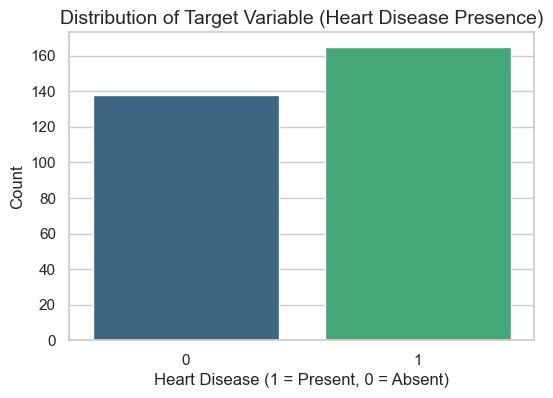

In [85]:
# Univariate analysis: Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=heart_data, hue="target", palette="viridis", legend=False)
plt.title("Distribution of Target Variable (Heart Disease Presence)", fontsize=14)
plt.xlabel("Heart Disease (1 = Present, 0 = Absent)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

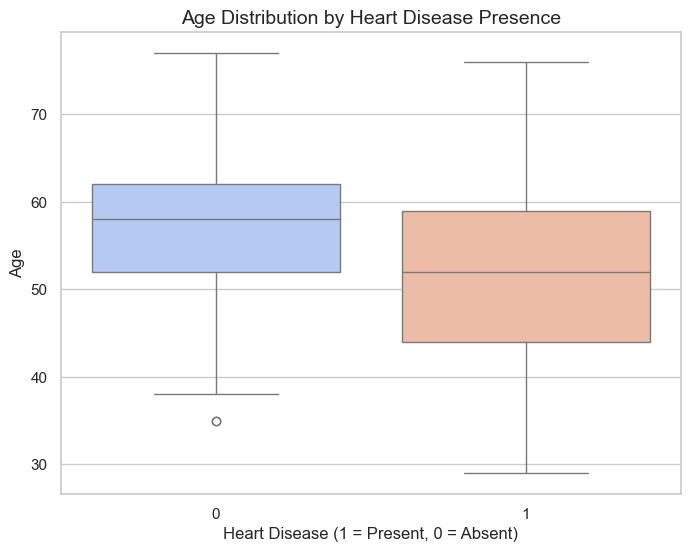

In [87]:
# Bivariate analysis: Age vs. Target
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=heart_data, hue="target", palette="coolwarm",legend=False)
plt.title("Age Distribution by Heart Disease Presence", fontsize=14)
plt.xlabel("Heart Disease (1 = Present, 0 = Absent)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

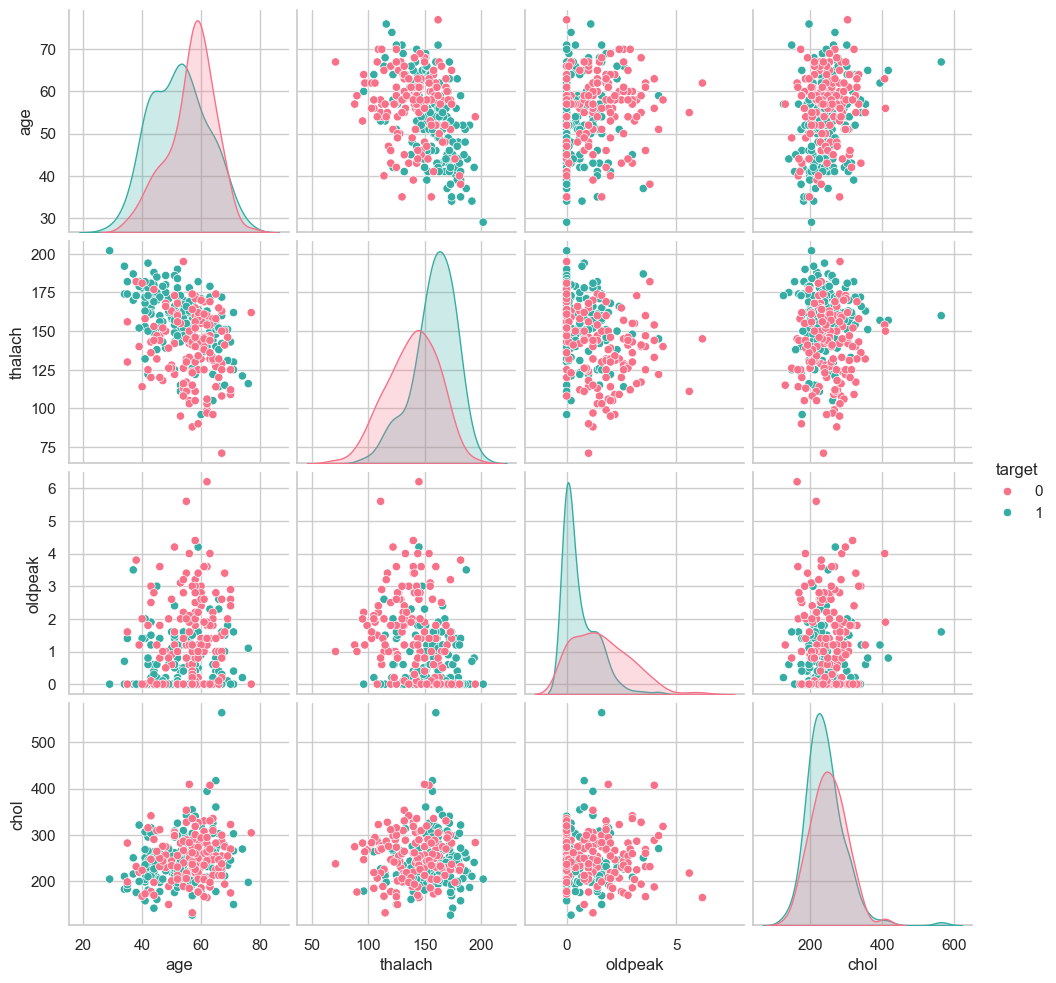

In [89]:
# Pairplot to examine relationships (selected features for simplicity)
selected_features = ["age", "thalach", "oldpeak", "chol", "target"]
sns.pairplot(heart_data[selected_features], hue="target", palette="husl", diag_kind="kde")
plt.show()


In [93]:
# Check data types and identify any anomalies in the selected features
selected_features = ["age", "thalach", "oldpeak", "chol", "target"]
data_types = heart_data[selected_features].dtypes

# Check for non-numeric entries or unusual values
anomalies = heart_data[selected_features].apply(lambda col: col.map(lambda x: not isinstance(x, (int, float))))


data_types, anomalies.sum()  # Show data types and count of non-numeric entries per column


(age          int64
 thalach      int64
 oldpeak    float64
 chol         int64
 target       int64
 dtype: object,
 age        0
 thalach    0
 oldpeak    0
 chol       0
 target     0
 dtype: int64)

<Figure size 1200x800 with 0 Axes>

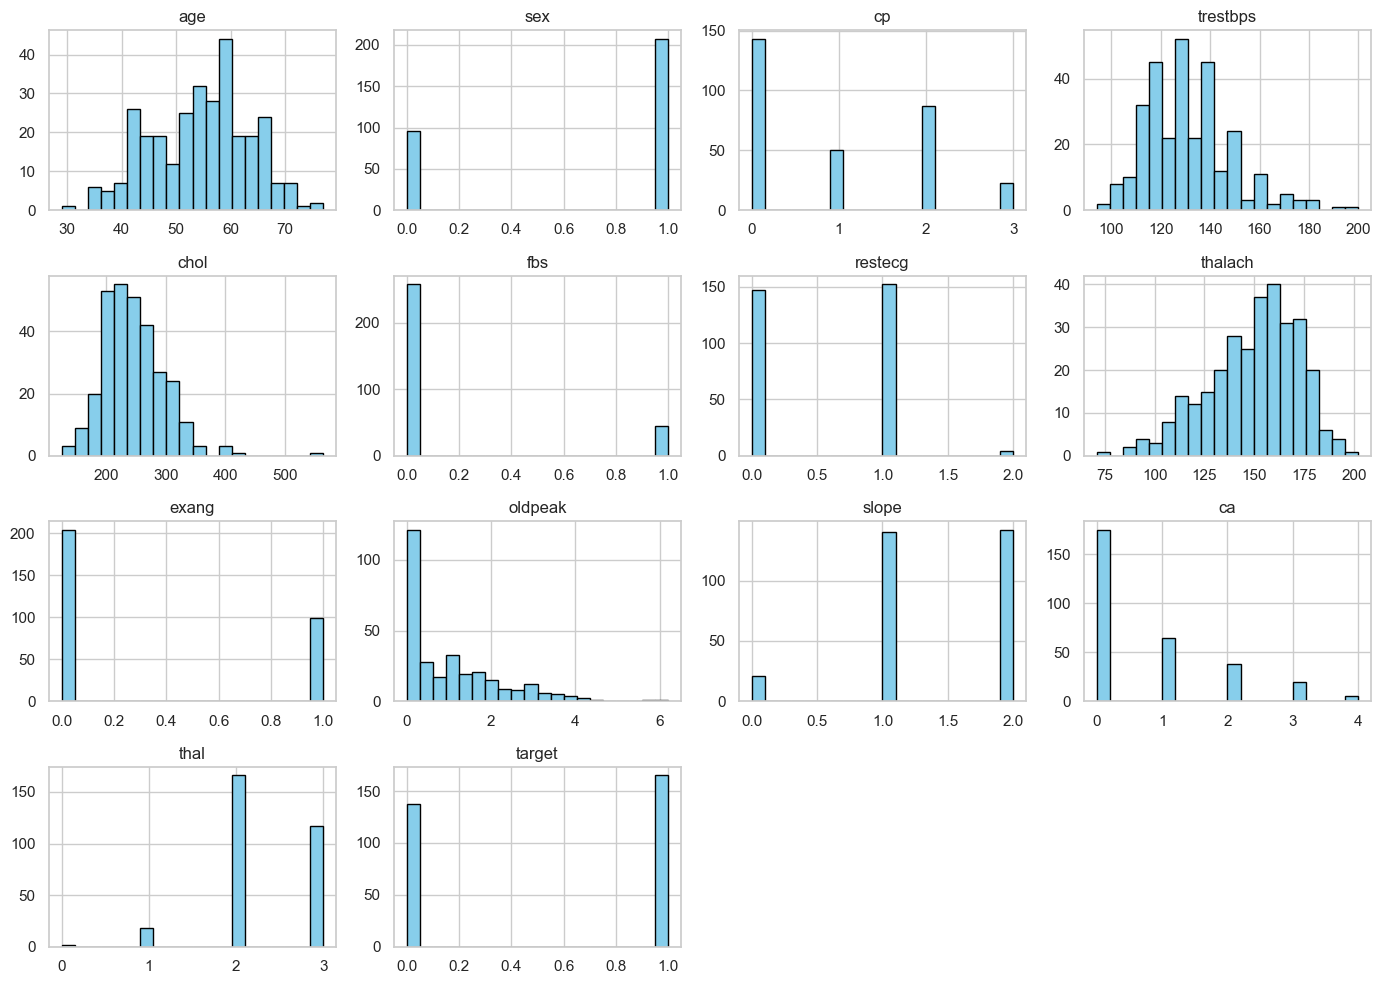

In [95]:
# Univariate analysis
plt.figure(figsize=(12, 8))
heart_data.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

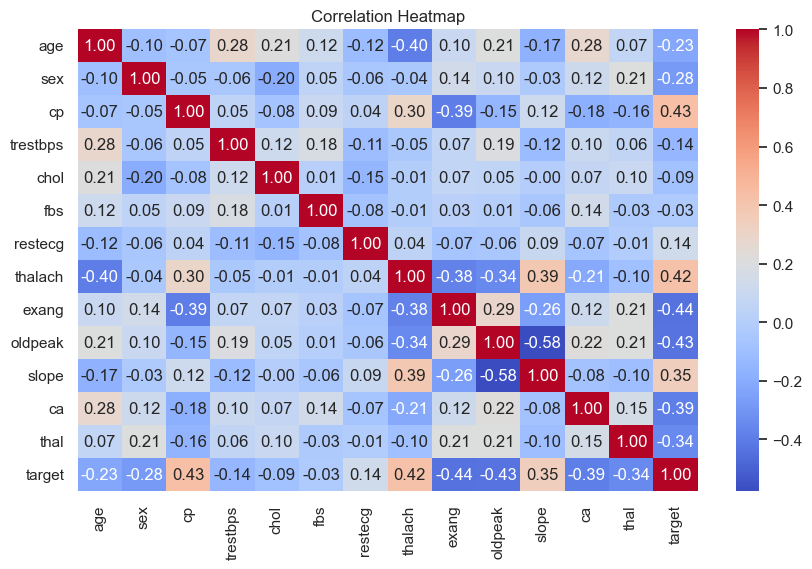

In [99]:
# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Naive Bayes Evaluation Metrics:


Accuracy: 0.87


Confusion Matrix:
[[26  3]
 [ 5 27]]



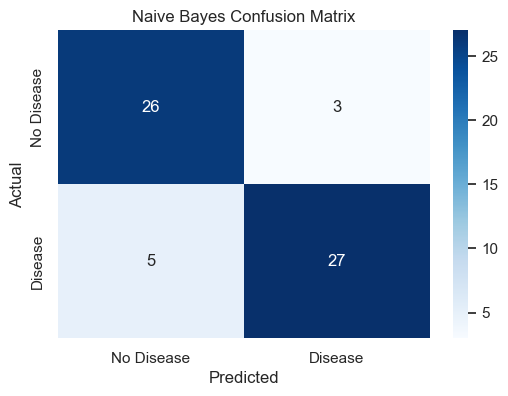


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Random Forest Evaluation Metrics:


Accuracy: 0.84


Confusion Matrix:
[[24  5]
 [ 5 27]]



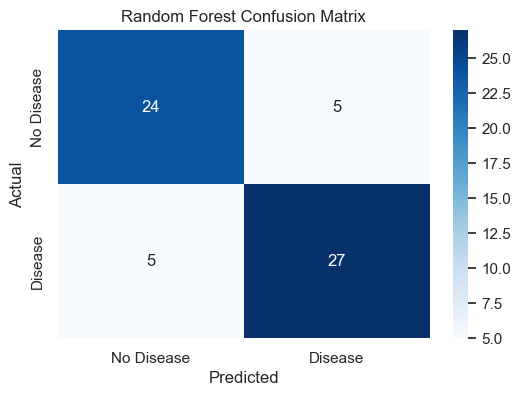


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


ROC AUC Score:
 0.92


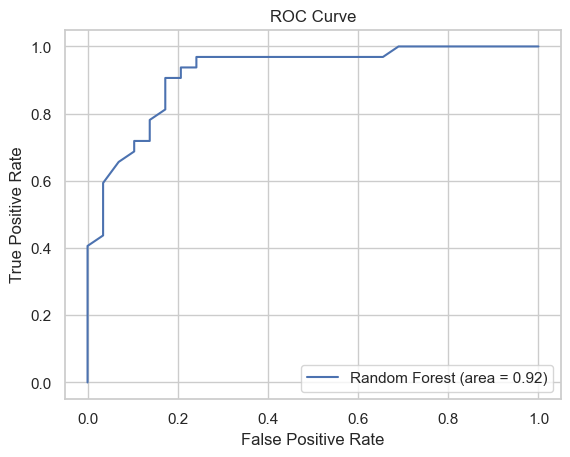

In [100]:
# Splitting the dataset into features and target
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation Metrics:\n")
    print(f"\nAccuracy: {accuracy_score(y_true, y_pred):.2f}\n")
    print(f"\nConfusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")
    cm = confusion_matrix(y_true, y_pred)
    
    # Plotting the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    
    print(f"\nClassification Report:\n{classification_report(y_true, y_pred)}\n")
    if model_name != "Naive Bayes":  # ROC Curve requires probability scores
        y_prob = rf_model.predict_proba(X_test)[:, 1]
        print(f"ROC AUC Score:\n {roc_auc_score(y_true, y_prob):.2f}")
        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc_score(y_true, y_prob):.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

# Evaluate Naive Bayes
evaluate_model(y_test, nb_pred, "Naive Bayes")

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, "Random Forest")


#### Naive Bayes: 
Suitable for deployment in scenarios where precision is critical (e.g., minimizing unnecessary treatments).
Its balanced performance across metrics makes it reliable in detecting both "Disease" and "No Disease" cases.

#### Random Forest:
Recommended in situations where robust separation of classes is paramount, due to its high ROC AUC score.
With hyperparameter tuning, the Random Forest model's accuracy and precision-recall metrics might improve further.

#### Conclusion: Performance Comparison of Naive Bayes and Random Forest Models

Naive Bayes provides slightly better accuracy and F1-scores, making it a strong general-purpose choice.
    
Random Forest has a competitive ROC AUC score, indicating its strength in decision-making, especially in more complex or high-dimensional datasets.
    
Given the balanced nature of the problem (equal importance of identifying "Disease" and "No Disease"), Naive Bayes is marginally more favorable due to its overall performance consistency. However, Random Forest can be an excellent alternative with further tuning or in scenarios prioritizing class separation.